In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests
from datetime import datetime

from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=905b32babdb8b30c96f3b85b5e463ca8


In [3]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=905b32babdb8b30c96f3b85b5e463ca8&q=Boston


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [8]:
city_weather.status_code

200

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"base":"stations","main":{"temp":72.5,"feels_like":65.55,"temp_min":69.01,"temp_max":75.99,"pressure":1029,"humidity":46},"visibility":16093,"wind":{"speed":12.75,"deg":110},"clouds":{"all":40},"dt":1592341831,"sys":{"type":1,"id":3486,"country":"US","sunrise":1592298415,"sunset":1592353396},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [11]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 72.5,
  'feels_like': 65.55,
  'temp_min': 69.01,
  'temp_max': 75.99,
  'pressure': 1029,
  'humidity': 46},
 'visibility': 16093,
 'wind': {'speed': 12.75, 'deg': 110},
 'clouds': {'all': 40},
 'dt': 1592341831,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592298415,
  'sunset': 1592353396},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [14]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=905b32babdb8b30c96f3b85b5e463ca8&q=Boston


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 72.5,
  'feels_like': 65.55,
  'temp_min': 69.01,
  'temp_max': 75.99,
  'pressure': 1029,
  'humidity': 46},
 'visibility': 16093,
 'wind': {'speed': 12.75, 'deg': 110},
 'clouds': {'all': 40},
 'dt': 1592341831,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592298415,
  'sunset': 1592353396},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data["sys"]

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1592298415,
 'sunset': 1592353396}

In [17]:
boston_data["sys"]["country"]

'US'

In [18]:
boston_data["dt"]

1592341831

In [19]:
boston_data["coord"]["lat"]

42.36

In [20]:
boston_data["main"]["temp_max"]

75.99

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 75.99 46 40 12.75


In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 6, 16, 21, 10, 31)

In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | northam
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | along
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | clarence town
Processing Record 9 of Set 1 | acajutla
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | chapleau
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | sinkat
City not found. Skipping...
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | evensk
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | nargana
Processing Record 21 of Set 1 | geraldton
Processing Record 22 of Set 1 | taolanaro
City not fou

Processing Record 40 of Set 4 | buala
Processing Record 41 of Set 4 | port lincoln
Processing Record 42 of Set 4 | ucar
Processing Record 43 of Set 4 | lodja
Processing Record 44 of Set 4 | touros
Processing Record 45 of Set 4 | haines junction
Processing Record 46 of Set 4 | sao jose da coroa grande
Processing Record 47 of Set 4 | inisa
Processing Record 48 of Set 4 | jining
Processing Record 49 of Set 4 | manzil tamim
City not found. Skipping...
Processing Record 50 of Set 4 | ostrovnoy
Processing Record 1 of Set 5 | narsaq
Processing Record 2 of Set 5 | pop
Processing Record 3 of Set 5 | ngunguru
Processing Record 4 of Set 5 | saint-augustin
Processing Record 5 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 5 | denpasar
Processing Record 7 of Set 5 | qui nhon
Processing Record 8 of Set 5 | jasper
Processing Record 9 of Set 5 | san matias
Processing Record 10 of Set 5 | eyl
Processing Record 11 of Set 5 | broken hill
Processing Record 12 of S

Processing Record 28 of Set 8 | kabalo
Processing Record 29 of Set 8 | tiznit
Processing Record 30 of Set 8 | praia da vitoria
Processing Record 31 of Set 8 | ahuimanu
Processing Record 32 of Set 8 | madimba
Processing Record 33 of Set 8 | waycross
Processing Record 34 of Set 8 | waitati
Processing Record 35 of Set 8 | arica
Processing Record 36 of Set 8 | maracaju
Processing Record 37 of Set 8 | yinchuan
Processing Record 38 of Set 8 | semily
Processing Record 39 of Set 8 | yeppoon
Processing Record 40 of Set 8 | alice springs
Processing Record 41 of Set 8 | nemuro
Processing Record 42 of Set 8 | husavik
Processing Record 43 of Set 8 | poya
Processing Record 44 of Set 8 | san cristobal
Processing Record 45 of Set 8 | iranshahr
Processing Record 46 of Set 8 | fort abbas
Processing Record 47 of Set 8 | san policarpo
Processing Record 48 of Set 8 | khash
Processing Record 49 of Set 8 | bouna
Processing Record 50 of Set 8 | timaru
Processing Record 1 of Set 9 | bam
Processing Record 2 of 

Processing Record 17 of Set 12 | temaraia
City not found. Skipping...
Processing Record 18 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 19 of Set 12 | garowe
Processing Record 20 of Set 12 | altay
Processing Record 21 of Set 12 | verkhnyaya inta
Processing Record 22 of Set 12 | schaffhausen
Processing Record 23 of Set 12 | qingdao
Processing Record 24 of Set 12 | le moule
Processing Record 25 of Set 12 | klaksvik
Processing Record 26 of Set 12 | riyadh
Processing Record 27 of Set 12 | fruitvale
Processing Record 28 of Set 12 | modica
Processing Record 29 of Set 12 | wakkanai
Processing Record 30 of Set 12 | tomatlan
Processing Record 31 of Set 12 | turriff
Processing Record 32 of Set 12 | waddan
Processing Record 33 of Set 12 | acarau
Processing Record 34 of Set 12 | felidhoo
City not found. Skipping...
Processing Record 35 of Set 12 | kurayoshi
Processing Record 36 of Set 12 | altoona
Processing Record 37 of Set 12 | naze
Processing Record 38 of Set 12 | baoning


In [25]:
len(city_data)

576

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.63,147.92,80.04,27,46,8.68,RU,2020-06-16 21:12:50
1,Northam,51.03,-4.22,57.00,93,85,3.00,GB,2020-06-16 21:15:02
2,Tuktoyaktuk,69.45,-133.04,60.80,59,75,14.99,CA,2020-06-16 21:12:52
3,Bluff,-46.60,168.33,54.27,75,62,13.24,NZ,2020-06-16 21:12:55
4,Dikson,73.51,80.55,32.29,94,100,13.60,RU,2020-06-16 21:14:23
5,Along,28.17,94.77,73.44,90,77,0.54,IN,2020-06-16 21:21:28
6,Ushuaia,-54.80,-68.30,37.40,86,75,4.70,AR,2020-06-16 21:09:10
7,Clarence Town,-32.58,151.78,46.99,93,20,8.05,AU,2020-06-16 21:21:28
8,Acajutla,13.59,-89.83,86.00,62,40,3.36,SV,2020-06-16 21:19:05
9,East London,-33.02,27.91,59.92,71,35,8.66,ZA,2020-06-16 21:13:40


In [27]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2020-06-16 21:12:50,70.63,147.92,80.04,27,46,8.68
1,Northam,GB,2020-06-16 21:15:02,51.03,-4.22,57.00,93,85,3.00
2,Tuktoyaktuk,CA,2020-06-16 21:12:52,69.45,-133.04,60.80,59,75,14.99
3,Bluff,NZ,2020-06-16 21:12:55,-46.60,168.33,54.27,75,62,13.24
4,Dikson,RU,2020-06-16 21:14:23,73.51,80.55,32.29,94,100,13.60
5,Along,IN,2020-06-16 21:21:28,28.17,94.77,73.44,90,77,0.54
6,Ushuaia,AR,2020-06-16 21:09:10,-54.80,-68.30,37.40,86,75,4.70
7,Clarence Town,AU,2020-06-16 21:21:28,-32.58,151.78,46.99,93,20,8.05
8,Acajutla,SV,2020-06-16 21:19:05,13.59,-89.83,86.00,62,40,3.36
9,East London,ZA,2020-06-16 21:13:40,-33.02,27.91,59.92,71,35,8.66


In [28]:
new_city_data_df.count()

City          576
Country       576
Date          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
dtype: int64

In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
new_city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = new_city_data_df["Lat"]
max_temps = new_city_data_df["Max Temp"]
humidity = new_city_data_df["Humidity"]
cloudiness = new_city_data_df["Cloudiness"]
wind_speed = new_city_data_df["Wind Speed"]

In [31]:
# Import the time module.
import time

In [32]:
# # Get today's date in seconds.
# today = time.time()
# today

In [33]:
# today = time.strftime("%x")
# today

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

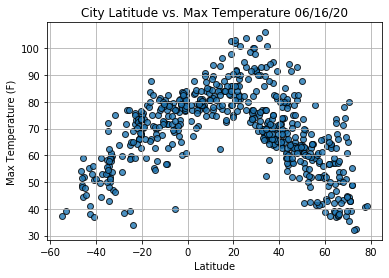

In [35]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

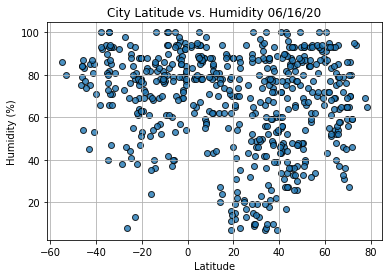

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

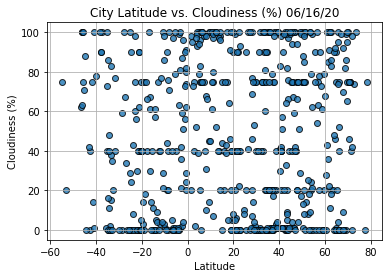

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

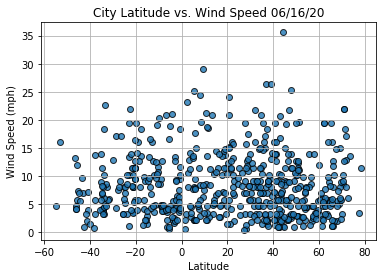

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()